# Malware Detection

#### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

#### Loading Dataset

In [2]:
df = pd.read_csv('MalwareData.csv',sep='|')
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


#### Checking value count of class labels

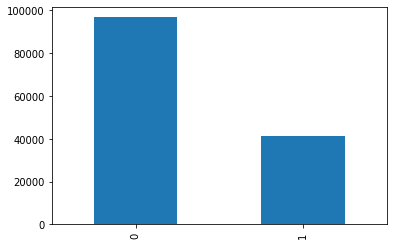

In [3]:
df['legitimate'].value_counts().plot(kind='bar')

#### Segregating data 

In [4]:
genuine = df[:41323].drop(['legitimate'],axis=1)   # axis = 1 means vertical 
malware = df[41323:].drop(['legitimate'],axis=1)

print(f'Total instances of Genuine data is   {genuine.shape}')
print(f'Total instances of Malicious data is {malware.shape}')

Total instances of Genuine data is   (41323, 56)
Total instances of Malicious data is (96724, 56)


In [5]:
print(f'Total shape of our dataset is {df.shape}')
print("Unique instances present in Name variable is {}".format(df['md5'].nunique()))
print("Unique instances present in Name variable is {}".format(df['Name'].nunique()))

Total shape of our dataset is (138047, 57)
Unique instances present in Name variable is 138047
Unique instances present in Name variable is 107488


#### As these 2 varibles has lots of unique instanes within them , we can simply drop them 

In [6]:
X_Data = df.drop(['Name', 'md5', 'legitimate'], axis=1).values
Y_Target = df['legitimate'].values

### Feature Importance 

In [7]:
classifier = sklearn.ensemble.ExtraTreesClassifier().fit(X_Data, Y_Target)
best_features = SelectFromModel(classifier, prefit=True)
X_Data_new = best_features.transform(X_Data)
print(f'Shape of new dataset after extracting important features is  : {X_Data_new.shape}')
print(f'Shape of old dataset was :                                     {X_Data.shape}')

Shape of new dataset after extracting important features is  : (138047, 13)
Shape of old dataset was :                                     (138047, 54)


#### Plotting Important Variable and their feature importance 

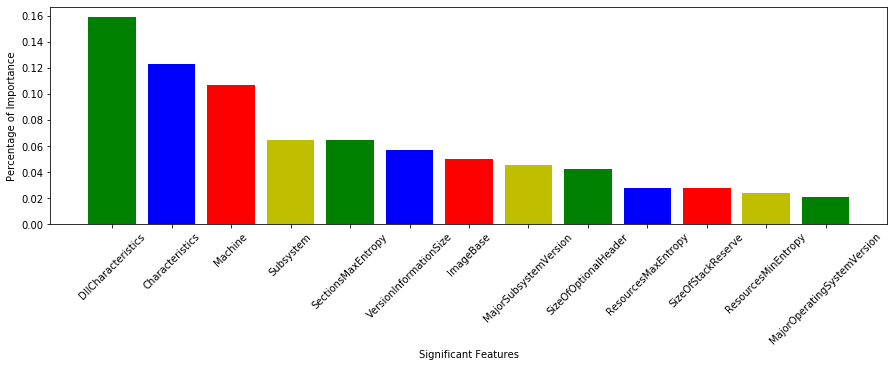

In [8]:
features = X_Data_new.shape[1]
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

feature_imp = {}
for i in range(features):
    #print(df.columns[2+indices[i]], importances[indices[i]])
    column_name   = df.columns[2+indices[i]]
    feature_value = importances[indices[i]]
    feature_imp[column_name] = feature_value


plt.figure(figsize=(15,4))
plt.bar(list(feature_imp.keys()), feature_imp.values(), color='gbry')
plt.ylabel ('Percentage of Importance')
plt.xlabel ('Significant Features')
plt.xticks(rotation=45)
plt.show()

#### Train Test Splitting Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_Data_new, Y_Target, test_size = 0.20, random_state = 0)

print(f'Shape of our train dataset is {X_train.shape} and {y_train.shape} ')
print(f'Shape of our test dataset is  {X_test.shape} and  {y_test.shape} ')

Shape of our train dataset is (110437, 13) and (110437,) 
Shape of our test dataset is  (27610, 13) and  (27610,) 


## XG Boost Classifier

In [18]:
classifier = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=50)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

f'Model Accuracy of XGBoost on Test data is {classifier.score(X_test,y_test)*100}'

'Model Accuracy of XGBoost on Test data is 99.3408185440058'

In [19]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

false_positive_score = confusion_matrix[0][1]/sum(confusion_matrix[0])*100
false_negative_score = confusion_matrix[1][0]/sum(confusion_matrix[1])*100

print(f'False Positive Score for this model is {false_positive_score}')
print(f'False Negative Score for this model is {false_negative_score}')

[[19312   101]
 [   81  8116]]
False Positive Score for this model is 0.520269922217071
False Negative Score for this model is 0.9881664023423204


## Random Forest Classifier

In [12]:
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(f'Model Accuracy of Random Forest on Test data is {classifier.score(X_test,y_test)*100}')

Model Accuracy of Random Forest on Test data is 99.47120608475191


In [13]:
confusion_matrix(y_test.tolist(), y_pred.tolist())

array([[19323,    90],
       [   56,  8141]])

In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

false_positive_score = confusion_matrix[0][1]/sum(confusion_matrix[0])*100
false_negative_score = confusion_matrix[1][0]/sum(confusion_matrix[1])*100

print(f'False Positive Score for this model is {false_positive_score}')
print(f'False Negative Score for this model is {false_negative_score}')

[[19323    90]
 [   56  8141]]
False Positive Score for this model is 0.4636068613815485
False Negative Score for this model is 0.6831767719897524
